In [1]:
from deep_lab import DeepLab
import os
from ultralytics import YOLO
import matplotlib.pyplot as plt
import numpy as np
import cv2


2025-09-30 06:52:51.480070147 [W:onnxruntime:Default, device_discovery.cc:164 DiscoverDevicesForPlatform] GPU device discovery failed: device_discovery.cc:89 ReadFileContents Failed to open file: "/sys/class/drm/card1/device/vendor"


In [2]:
deep_lab = DeepLab(model_path = 'models/land-seg.pth')
fp16 = YOLO('models/land-segFP16.engine')
fp32 = YOLO('models/land-segFP32.engine')
pytorch = YOLO('models/land-seg.pt')

Modelo pronto para inferência ✅


image 1/1 /home/jetson/Documents/YOLO_tests/test_images/000000006980.jpg: 512x512 14 lands, 8.4ms
Speed: 1.9ms preprocess, 8.4ms inference, 4.8ms postprocess per image at shape (1, 3, 512, 512)

Speed: 1.9ms preprocess, 8.4ms inference, 4.8ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 /home/jetson/Documents/YOLO_tests/test_images/000000006980.jpg: 512x512 14 lands, 15.7ms
Speed: 1.9ms preprocess, 15.7ms inference, 10.7ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 /home/jetson/Documents/YOLO_tests/test_images/000000006980.jpg: 512x512 14 lands, 15.7ms
Speed: 1.9ms preprocess, 15.7ms inference, 10.7ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 /home/jetson/Documents/YOLO_tests/test_images/000000006980.jpg: 512x512 14 lands, 36.8ms
Speed: 2.5ms preprocess, 36.8ms inference, 7.2ms postprocess per image at shape (1, 3, 512, 512)
image 1/1 /home/jetson/Documents/YOLO_tests/test_images/000000006980.jpg: 512x512 14 lands, 36.8ms
Speed: 2.5ms prep

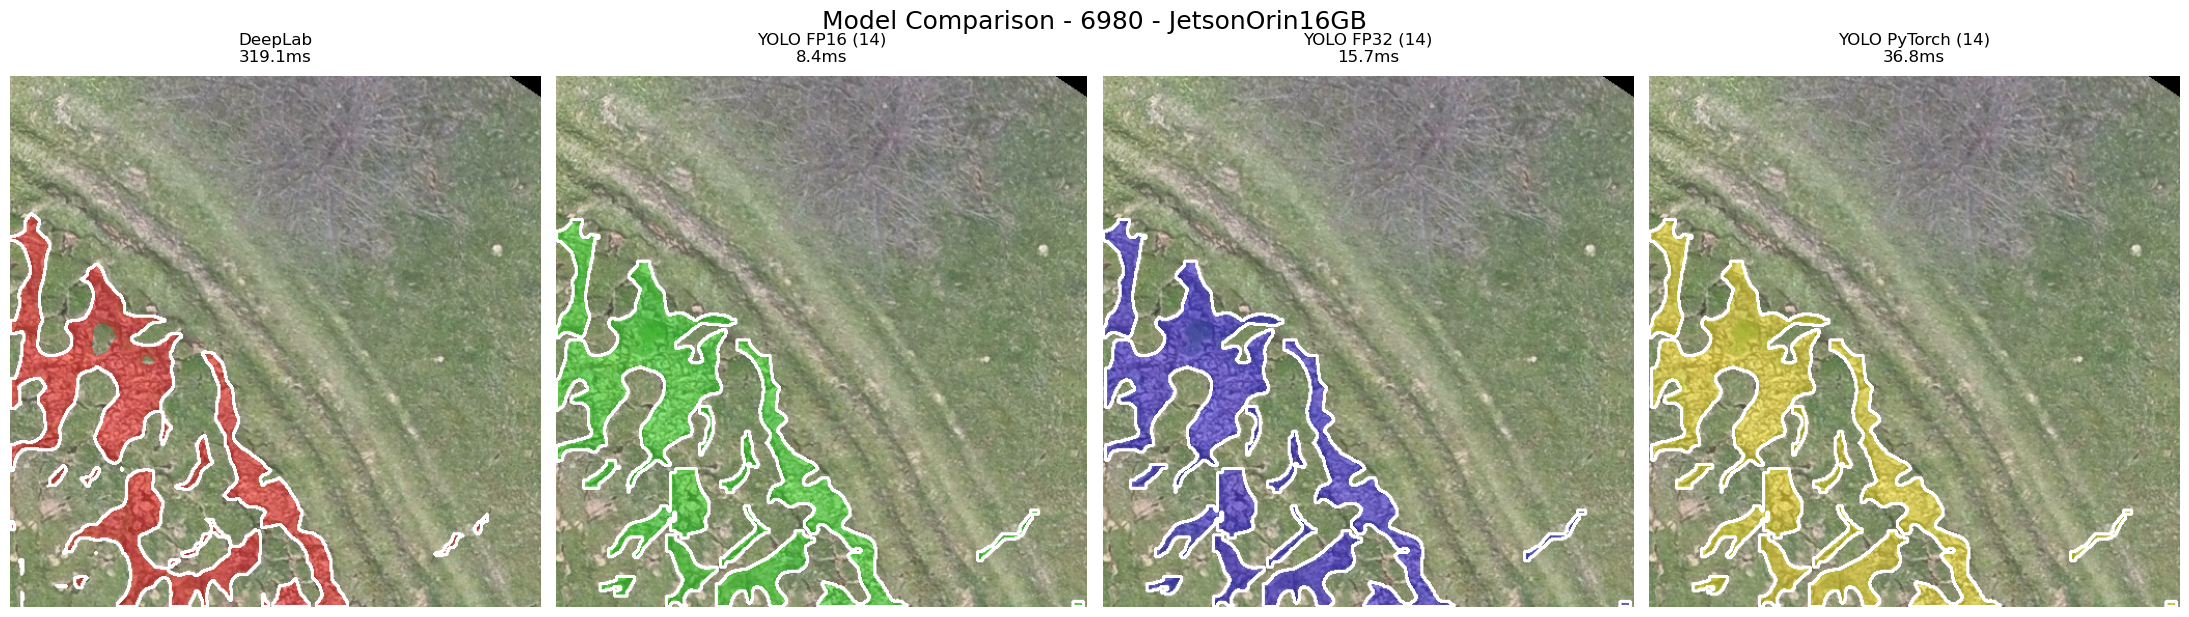


image 1/1 /home/jetson/Documents/YOLO_tests/test_images/000000000135.jpg: 512x512 15 lands, 10.6ms
Speed: 2.8ms preprocess, 10.6ms inference, 7.8ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 /home/jetson/Documents/YOLO_tests/test_images/000000000135.jpg: 512x512 15 lands, 10.6ms
Speed: 2.8ms preprocess, 10.6ms inference, 7.8ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 /home/jetson/Documents/YOLO_tests/test_images/000000000135.jpg: 512x512 15 lands, 15.7ms
Speed: 2.7ms preprocess, 15.7ms inference, 12.1ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 /home/jetson/Documents/YOLO_tests/test_images/000000000135.jpg: 512x512 15 lands, 15.7ms
Speed: 2.7ms preprocess, 15.7ms inference, 12.1ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 /home/jetson/Documents/YOLO_tests/test_images/000000000135.jpg: 512x512 15 lands, 37.4ms
Speed: 2.9ms preprocess, 37.4ms inference, 8.7ms postprocess per image at shape (1, 3, 512, 512)
image 1/1 /ho

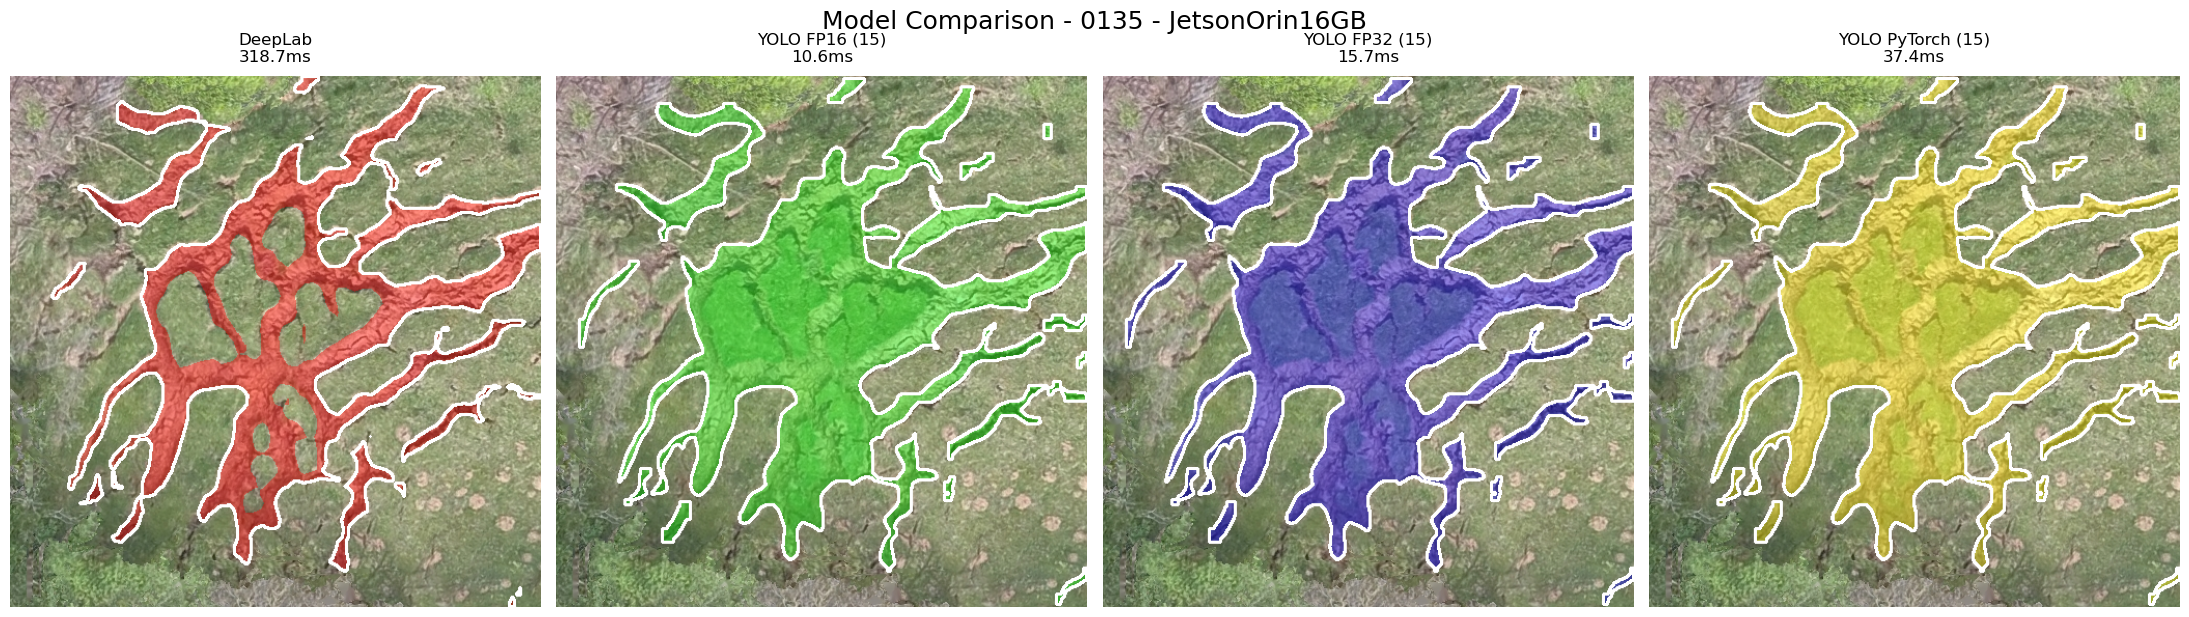


image 1/1 /home/jetson/Documents/YOLO_tests/test_images/000000008003.jpg: 512x512 46 lands, 10.9ms
Speed: 2.8ms preprocess, 10.9ms inference, 11.3ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 /home/jetson/Documents/YOLO_tests/test_images/000000008003.jpg: 512x512 46 lands, 10.9ms
Speed: 2.8ms preprocess, 10.9ms inference, 11.3ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 /home/jetson/Documents/YOLO_tests/test_images/000000008003.jpg: 512x512 46 lands, 15.6ms
Speed: 2.8ms preprocess, 15.6ms inference, 16.5ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 /home/jetson/Documents/YOLO_tests/test_images/000000008003.jpg: 512x512 46 lands, 15.6ms
Speed: 2.8ms preprocess, 15.6ms inference, 16.5ms postprocess per image at shape (1, 3, 512, 512)

image 1/1 /home/jetson/Documents/YOLO_tests/test_images/000000008003.jpg: 512x512 46 lands, 45.7ms
Speed: 2.8ms preprocess, 45.7ms inference, 14.1ms postprocess per image at shape (1, 3, 512, 512)
image 1/1 

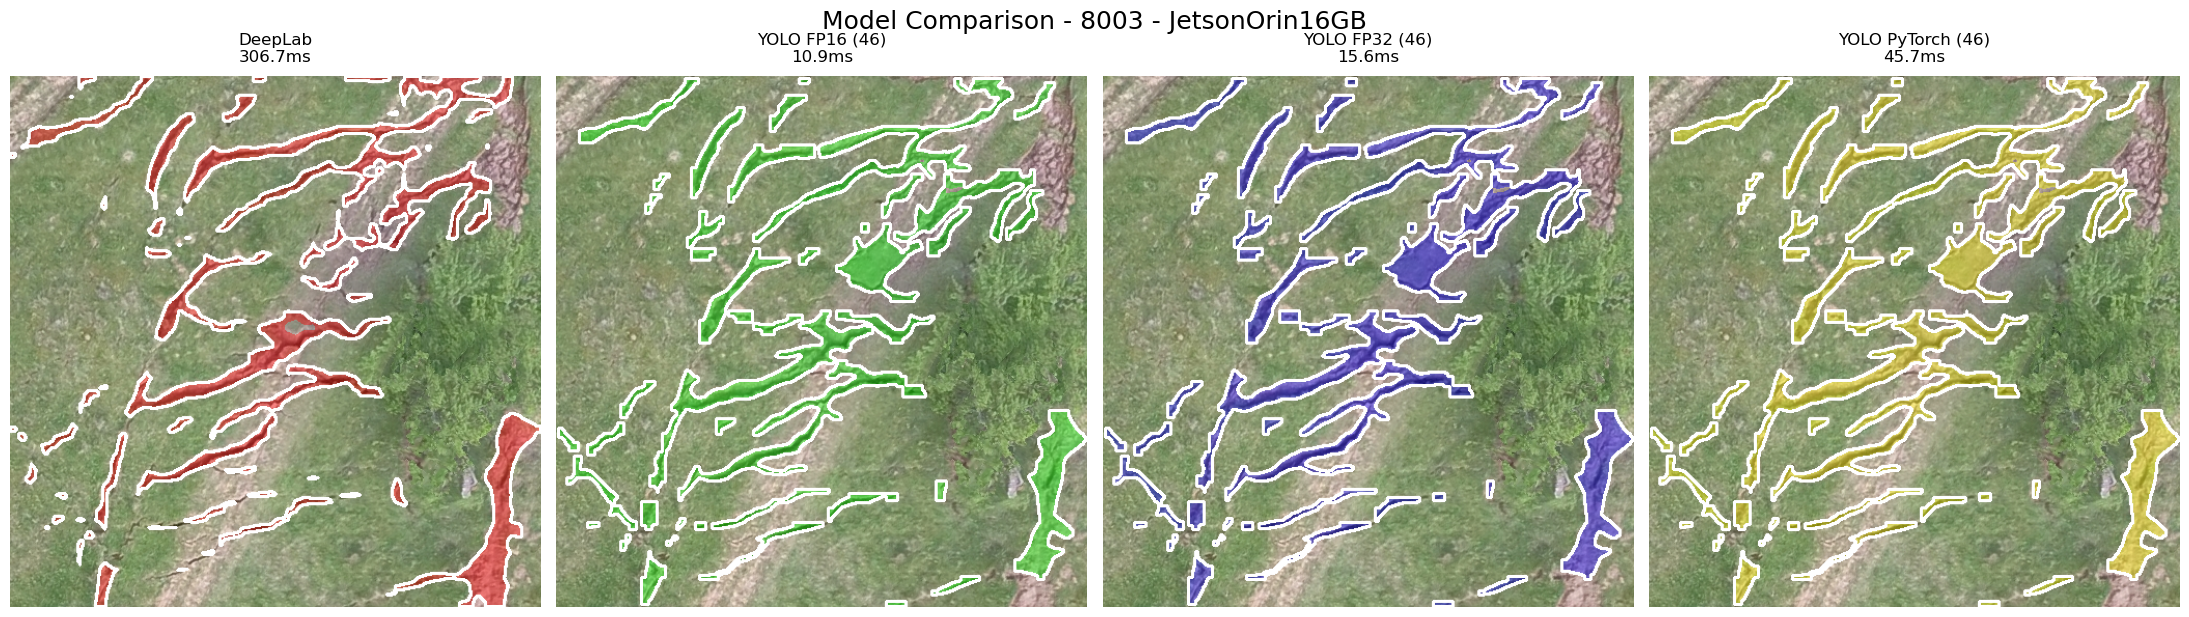

In [ ]:

def create_overlay(image, mask, color=[255, 0, 0], alpha=0.4, contour=True):
    overlay = image.copy()
    
    if hasattr(mask, 'masks') and mask.masks is not None:
        combined_mask = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
        for i in range(len(mask.masks.data)):
            yolo_mask = mask.masks.data[i].cpu().numpy()
            yolo_mask = cv2.resize(yolo_mask, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)
            binary_mask = (yolo_mask > 0.5).astype(np.uint8)
            combined_mask = np.logical_or(combined_mask, binary_mask).astype(np.uint8)
        binary_mask = combined_mask
    else:
        binary_mask = mask.copy()
        if binary_mask.shape != image.shape[:2]:
            binary_mask = cv2.resize(binary_mask, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)

    colored_mask = np.zeros_like(image)
    colored_mask[binary_mask == 1] = color
    mask_indices = binary_mask == 1
    overlay[mask_indices] = (1 - alpha) * image[mask_indices] + alpha * colored_mask[mask_indices]

    if contour:
        contours, _ = cv2.findContours(binary_mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cv2.drawContours(overlay, contours, -1, color=[255,255,255], thickness=2)

    return overlay.astype(np.uint8)

for file in os.listdir('test_images/'):
    img_path = os.path.join('test_images', file)
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    
    deep_lab_result = deep_lab.predict(img_path)
    fp16_result = fp16(img_path)
    fp32_result = fp32(img_path)
    pytorch_result = pytorch(img_path)

    deeplab_mask = deep_lab_result[0].prediction

    
    overlays = [
        create_overlay(img_rgb, deeplab_mask, color=[255, 0, 0]),          
        create_overlay(img_rgb, fp16_result[0], color=[0, 255, 0]),        
        create_overlay(img_rgb, fp32_result[0], color=[0, 0, 255]),        
        create_overlay(img_rgb, pytorch_result[0], color=[255, 255, 0])    
    ]

    titles = [
        f'DeepLab\n{deep_lab_result[0].speed["inference"]:.1f}ms',
        f'YOLO FP16 ({len(fp16_result[0].masks.data) if fp16_result[0].masks else 0})\n{fp16_result[0].speed["inference"]:.1f}ms',
        f'YOLO FP32 ({len(fp32_result[0].masks.data) if fp32_result[0].masks else 0})\n{fp32_result[0].speed["inference"]:.1f}ms',
        f'YOLO PyTorch ({len(pytorch_result[0].masks.data) if pytorch_result[0].masks else 0})\n{pytorch_result[0].speed["inference"]:.1f}ms'
    ]

    fig, axes = plt.subplots(1, 4, figsize=(22, 6))
    for ax, overlay_img, title in zip(axes, overlays, titles):
        ax.imshow(overlay_img)
        ax.set_title(title, fontsize=12, pad=10)
        ax.axis('off')
    
    file_name = file.split('.')[0][-4:]
    plt.suptitle(f'Model Comparison - {file_name} - JetsonOrin16GB', fontsize=18, y=1.02)
    plt.tight_layout() 

    plt.savefig(f'test_images/{file_name}_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
